Ecart type de X: 2.4325057258883964  Ecart type de Y: 2.482589844834683
Coefficient de corrélation : 0.9295605905110964
Theta0 estimé = 5.5274658287008736  Theta1 estimé =  0.9486997944551838
Erreur quadratique moyenne: 0.8376914371160101


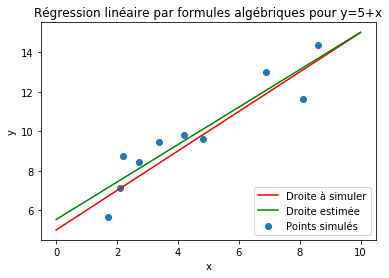

In [3]:
# Régression linéaire univariée : formules dérivées analytiquement
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

def h_lineaire_univarie(theta,x):
    return theta[0]+theta[1]*x
def eqm(Y_estime,Y,m):
    return (((Y_estime-Y)**2).sum())*1/m

# Génération de données qui suivent une distribution linéaire univariée avec résidus ~ N(0,1)
m=10 # nombre de lignes de données
theta_simule = (5,1)
np.random.seed(22) # Pour obtenir des résultats reproductibles avec les données aléatoires

X = np.random.rand(m)*m # m valeurs de x entre 0 et m
Y = h_lineaire_univarie(theta_simule,X)+np.random.randn(m) # Résidus N(0,1)
plt.scatter(X,Y,label = 'Points simulés') # Pour afficher les données aléatoires simulées

# Pour afficher la droite du modèle simulé
X_modele = np.arange(0,m+1,m) 
Y_modele = h_lineaire_univarie(theta_simule,X_modele)
plt.plot(X_modele, Y_modele,'-r',label = 'Droite à simuler')

# Calculer les estimations par les formules dérivées algébriquement
moyenneX = X.sum()/m
moyenneY = Y.sum()/m
diff_X = X-moyenneX
diff_Y = Y-moyenneY
covXY = (((diff_X)*(diff_Y)).sum())/m
varX = (((diff_X)**2).sum())/m
ecart_type_X = sqrt(varX)
varY = (((diff_Y)**2).sum())/m
ecart_type_Y = sqrt(varY)
corXY = covXY/(ecart_type_X*ecart_type_Y)
theta1_estime = covXY/varX
theta0_estime = moyenneY-theta1_estime*moyenneX
print("Ecart type de X:",ecart_type_X," Ecart type de Y:",ecart_type_Y)
print("Coefficient de corrélation :",corXY)
print("Theta0 estimé =",theta0_estime," Theta1 estimé = ",theta1_estime)

Y_estime = theta0_estime + theta1_estime*X # Valeurs estimées pour X
print("Erreur quadratique moyenne:", eqm(Y_estime,Y,m))

# Pour afficher la droite de régression estimée
Y_droite_estimee =  theta0_estime + theta1_estime*X_modele # Valeurs estimées pour X_modele
plt.plot(X_modele, Y_droite_estimee, '-g',label = 'Droite estimée')

plt.title("Régression linéaire par formules algébriques pour y=5+x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right')
plt.show()
